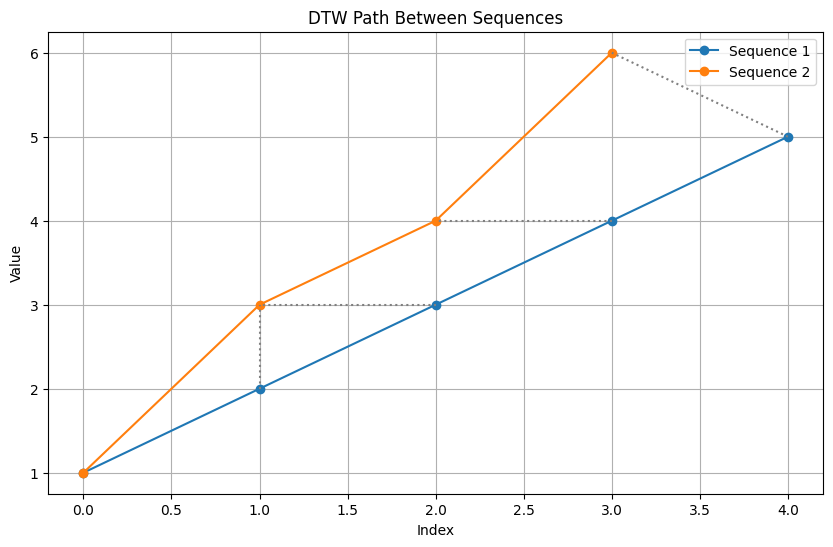

(2.0, [(0, 0), (1, 1), (2, 1), (3, 2), (4, 3)])

In [ ]:
import matplotlib.pyplot as plt

# Example sequences
sequence1 = np.array([1, 2, 3, 4, 5])
sequence2 = np.array([1, 3, 4, 6])

# Function to calculate DTW distance and path
def dtw(sequence1, sequence2):
    n = len(sequence1)
    m = len(sequence2)

    # Create the cost matrix
    cost = np.zeros((n, m))

    # Initialize the first cell
    cost[0, 0] = euclidean_dist(sequence1[0], sequence2[0])

    # Initialize the first column
    for i in range(1, n):
        cost[i, 0] = cost[i - 1, 0] + euclidean_dist(sequence1[i], sequence2[0])

    # Initialize the first row
    for j in range(1, m):
        cost[0, j] = cost[0, j - 1] + euclidean_dist(sequence1[0], sequence2[j])

    # Populate the rest of the cost matrix
    for i in range(1, n):
        for j in range(1, m):
            cost[i, j] = euclidean_dist(sequence1[i], sequence2[j]) + min(
                cost[i - 1, j],    # insertion
                cost[i, j - 1],    # deletion
                cost[i - 1, j - 1] # match
            )

    # The DTW distance is the cost of aligning the last elements of the sequences
    dtw_distance = cost[n - 1, m - 1]

    # Reconstruct the optimal path
    path = []
    i, j = n - 1, m - 1
    path.append((i, j))
    while i > 0 or j > 0:
        if i == 0:
            j -= 1
        elif j == 0:
            i -= 1
        else:
            min_cost = min(cost[i - 1, j], cost[i, j - 1], cost[i - 1, j - 1])
            if min_cost == cost[i - 1, j]:
                i -= 1
            elif min_cost == cost[i, j - 1]:
                j -= 1
            else:
                i -= 1
                j -= 1
        path.append((i, j))

    path.reverse()

    return dtw_distance, path

# Calculate DTW distance and path
dtw_distance, path = dtw(sequence1, sequence2)

# Plot the sequences and the DTW path
plt.figure(figsize=(10, 6))

# Plot sequences
plt.plot(sequence1, label='Sequence 1', marker='o')
plt.plot(sequence2, label='Sequence 2', marker='o')

# Plot DTW path
for (i, j) in path:
    plt.plot([i, j], [sequence1[i], sequence2[j]], color='gray', linestyle='dotted')

plt.title('DTW Path Between Sequences')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

dtw_distance, path
